Hemos sacado 3 grupos de 10 genes en los que las diferencias absolutas (entre RIN alto y bajo) en el porcentaje de su isoforma mayoritaria son altas, medias y bajas para TS10, TS11 y TS12 , respectivamente. (Usando el script grupos_genes.py). Ahora toca plotear el número de isoformas y porcentaje de la isoforma mayoritaria de estos genes frente a distintos valores de RIN. Por ejemplo, para cada gen del top.txt sacaaríamos el número de isoformas y porcentaje max en cada uno de los ficheros output de la carpeta Procesado y nos quedaríamos con su RIN. Podemos empezar simplemente viendo el número de isoformas por grupo.

In [3]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
grupos = [] # en orden top-med-tail
for i in ["top.txt","med.txt","tail.txt"]:
    ruta = "output/" + i
    lista = []
    with open(ruta) as f:
        for i in f:
            lista.append(i.strip())
    grupos.append(lista)


In [ ]:
top = grupos[0]
# Yo diría que lo mejor es generar un df en el que para cada gen se cuente el núm de isoformas por RIN.
archivos = glob.glob("../Procesado/outputs/TS10*")
resultados = [] # Una lista temporal con los df que voy creando para concatenar al final
for ruta in archivos:
    # Sacamos el RIN
    rin = float(ruta.split("_")[2])
    # Lo leemos como un DF
    df =  pd.read_csv(ruta, sep = "\t")
    # sacamos el porc max de cada gen
    porcentajes = df.groupby("associated_gene")["porcentaje"].max().reindex(top, fill_value= 0).to_frame(name="max_porcentaje")
    # Y el numero de isoformas de cada gen
    cuentas = df["associated_gene"].value_counts()
    cuentas_top = cuentas.reindex(top,fill_value=0).to_frame(name="count")
    # y lo juntamos
    tabla = cuentas_top.join(porcentajes)
    tabla["RIN"] = rin
    tabla = tabla.reset_index().rename(columns={"index": "gene_name"})
    resultados.append(tabla)
    
tabla_top = pd.concat(resultados,ignore_index=True)


In [14]:
top = grupos[1]
# Yo diría que lo mejor es generar un df en el que para cada gen se cuente el núm de isoformas por RIN.
#top_df = pd.DataFrame({"gene_name":"","RIN":"","n_isoformas":"","porc_max":""}) # Cada combinación de gene_name y RIN única será un punto
# Usando solo el TS10 por ejemplo
archivos = glob.glob("../Procesado/outputs/TS10*")
resultados = [] # Una lista temporal con los df que voy creando para concatenar al final
n = True
for ruta in archivos:
    if n == False:
        break
    # Sacamos el RIN
    rin = float(ruta.split("_")[2])
    # Lo leemos como un DF
    df =  pd.read_csv(ruta, sep = "\t")
    # sacamos el porc max de cada gen
    porcentajes = df.groupby("associated_gene")["porcentaje"].max().reindex(top, fill_value= 0).to_frame(name="max_porcentaje")
    # Y el numero de isoformas de cada gen
    cuentas = df["associated_gene"].value_counts()
    cuentas_top = cuentas.reindex(top,fill_value=0).to_frame(name="count")
    # y lo juntamos
    tabla = cuentas_top.join(porcentajes)
    tabla["RIN"] = rin
    tabla = tabla.reset_index().rename(columns={"index": "gene_name"})
    resultados.append(tabla)
    
tabla_med = pd.concat(resultados,ignore_index=True)


In [15]:
top = grupos[2]
# Yo diría que lo mejor es generar un df en el que para cada gen se cuente el núm de isoformas por RIN.
#top_df = pd.DataFrame({"gene_name":"","RIN":"","n_isoformas":"","porc_max":""}) # Cada combinación de gene_name y RIN única será un punto
# Usando solo el TS10 por ejemplo
archivos = glob.glob("../Procesado/outputs/TS10*")
resultados = [] # Una lista temporal con los df que voy creando para concatenar al final
n = True
for ruta in archivos:
    if n == False:
        break
    # Sacamos el RIN
    rin = float(ruta.split("_")[2])
    # Lo leemos como un DF
    df =  pd.read_csv(ruta, sep = "\t")
    # sacamos el porc max de cada gen
    porcentajes = df.groupby("associated_gene")["porcentaje"].max().reindex(top, fill_value= 0).to_frame(name="max_porcentaje")
    # Y el numero de isoformas de cada gen
    cuentas = df["associated_gene"].value_counts()
    cuentas_top = cuentas.reindex(top,fill_value=0).to_frame(name="count")
    # y lo juntamos
    tabla = cuentas_top.join(porcentajes)
    tabla["RIN"] = rin
    tabla = tabla.reset_index().rename(columns={"index": "gene_name"})
    resultados.append(tabla)
    
tabla_tail = pd.concat(resultados,ignore_index=True)

In [16]:
tabla_top["grupo"] = "Top"
tabla_med["grupo"] = "Med"
tabla_tail["grupo"] = "Low"
tablas = [tabla_top,tabla_med,tabla_tail]
tabla_final = pd.concat(tablas)
tabla_final

,associated_gene,count,max_porcentaje,RIN,grupo
0,ENSG00000131697,2,50.000000,7.7,Top
1,ENSG00000162755,3,33.333333,7.7,Top
2,ENSG00000159322,1,100.000000,7.7,Top
3,ENSG00000109927,1,100.000000,7.7,Top
4,ENSG00000117010,1,100.000000,7.7,Top
...,...,...,...,...,...
45,ENSG00000287431,1,100.000000,9.8,Low
46,ENSG00000284029,1,100.000000,9.8,Low
47,ENSG00000284427,1,100.000000,9.8,Low
48,ENSG00000285160,1,100.000000,9.8,Low


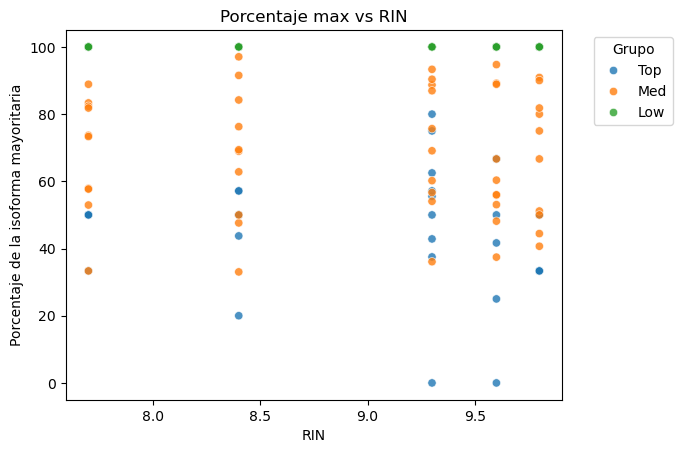

In [ ]:
sns.scatterplot(data = tabla_final, x = "RIN", y = "max_porcentaje", hue = "grupo", palette = "tab10",alpha = 0.8)
plt.ylim((-5,105))
plt.xlabel("RIN")
plt.ylabel("Porcentaje de la isoforma mayoritaria")
plt.title("Porcentaje max vs RIN en TOP")
plt.legend(title = "Grupo",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Porcentaje max vs RIN")
plt.show()

c:\Users\Andres\miniforge3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Andres\miniforge3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Andres\miniforge3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


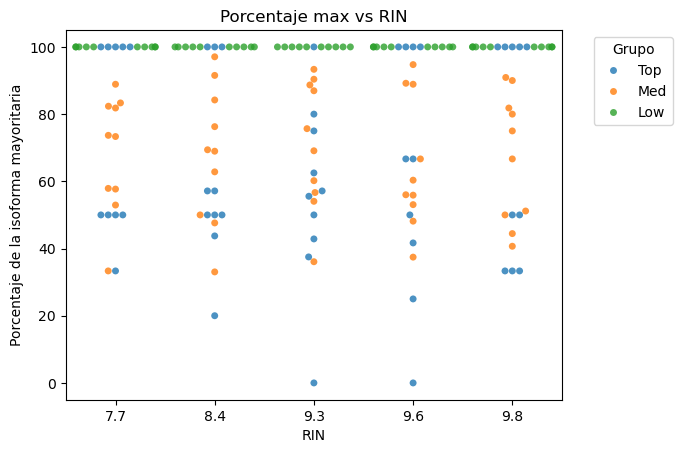

In [24]:
sns.swarmplot(data = tabla_final, x = "RIN", y = "max_porcentaje", hue = "grupo", palette = "tab10",alpha = 0.8)
plt.ylim((-5,105))
plt.xlabel("RIN")
plt.ylabel("Porcentaje de la isoforma mayoritaria")
plt.title("Porcentaje max vs RIN en TOP")
plt.legend(title = "Grupo",bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Porcentaje max vs RIN")
plt.show()

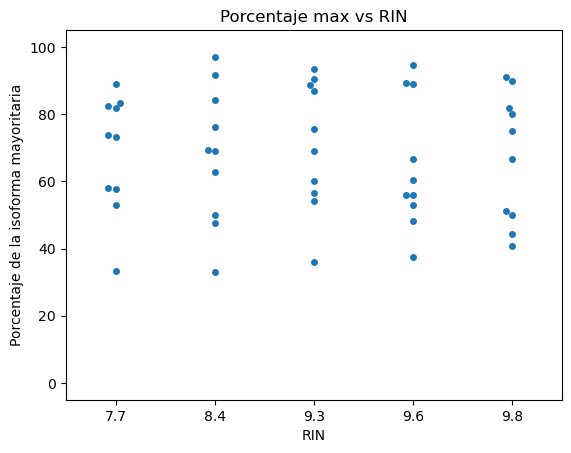

In [ ]:
# Aqui generamos los plots cambiando el =="Top" por Med o Low
sns.swarmplot(tabla_final[tabla_final["grupo"]=="Med"], x = "RIN", y = "max_porcentaje")
plt.ylim((-5,105))
plt.xlabel("RIN")
plt.ylabel("Porcentaje de la isoforma mayoritaria")
plt.title("Porcentaje max vs RIN")
plt.show()

In [ ]:
for i in ["Top", "Med", "Low"]:
    plt.figure(figsize=(10,6))
    df = tabla_final[tabla_final["grupo"] == i]
    sns.swarmplot(df, x = "RIN", y = "max_porcentaje", hue = "associated_gene",palette = "tab10", alpha = 0.8)
    plt.ylim((-5,105))
    plt.xlabel("RIN")
    plt.ylabel("% de isoforma mayoritaria")
    plt.title(f"% de isoforma mayoritaria vs RIN ({i})")
    plt.legend(title = "Gen",bbox_to_anchor=(1.05, 1), loc='upper left')
    archivo = f"Figuras/swarmplot_max_porcentaje_{i}.png"
    plt.tight_layout()
    plt.savefig(archivo)
    plt.close()

In [59]:
for i in ["Top", "Med", "Low"]:
    plt.figure(figsize=(10,6))
    df = tabla_final[tabla_final["grupo"] == i]
    sns.swarmplot(df, x = "RIN", y = "count", hue = "associated_gene",palette = "tab10", alpha = 0.8)
    plt.ylim((0,13))
    plt.xlabel("RIN")
    plt.ylabel("Número de isoformas detectadas")
    plt.title(f"Número de isoformas vs RIN ({i})")
    plt.legend(title = "Gen",bbox_to_anchor=(1.05, 1), loc='upper left')
    archivo = f"Figuras/swarmplot_counts_{i}.png"
    plt.tight_layout()
    plt.savefig(archivo)
    plt.close()

Ahora podemos buscar las longitudes de las lecturas de nuestros genes y plotear su distribución.

In [75]:
dfs_concat = []
grupos_dic ={0:"Top",1:"Med",2:"Low"}
n = 0
for i in grupos:
    top= i
    #top = grupos[2]
    archivos = glob.glob("../Procesado/inputs/TS10*")
    resultados = [] # Una lista temporal con los df que voy creando para concatenar al final
    for ruta in archivos:
        # Sacamos el RIN
        rin = float(ruta.split("_")[2])
        # Lo leemos como un DF
        df =  pd.read_csv(ruta, sep = "\t")
        df = df[["isoform","length","associated_gene","associated_transcript","ref_length"]]
        # Nos quedamos solo con los genes que  están en la lista
        df = df[df["associated_gene"].isin(top)]
        df["RIN"] = rin
        
        resultados.append(df)
    df_concat = pd.concat(resultados)
    df_concat["Grupo"] = grupos_dic[n]
    dfs_concat.append(df_concat)
    n += 1
df_final = pd.concat(dfs_concat)

C:\Users\Andres\AppData\Local\Temp\ipykernel_19884\2285783289.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(ruta, sep = "\t")
C:\Users\Andres\AppData\Local\Temp\ipykernel_19884\2285783289.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(ruta, sep = "\t")
C:\Users\Andres\AppData\Local\Temp\ipykernel_19884\2285783289.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(ruta, sep = "\t")
C:\Users\Andres\AppData\Local\Temp\ipykernel_19884\2285783289.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(ruta, sep = "\t")
C:\Users\Andres\AppData\Local\Temp\ipykernel_19884\2285783289.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  d

In [78]:
for i in ["Top", "Med", "Low"]:
    plt.figure(figsize=(10,6))
    df = df_final[df_final["Grupo"] == i]
    sns.violinplot(x="RIN", y="length", data=df)
    plt.ylim((-5,9000))
    plt.xlabel("RIN")
    plt.ylabel("Longitud de lectura")
    plt.title(f"Longitud de lecturas vs RIN ({i})")
    #plt.legend(title = "Gen",bbox_to_anchor=(1.05, 1), loc='upper left')
    archivo = f"Figuras/violinplot_length_{i}.png"
    plt.tight_layout()
    plt.savefig(archivo)
    plt.close()